In [1]:
%pip install pandas
%pip install sklearn
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import numpy as np

In [3]:
df_full = pd.concat([pd.read_csv("dataset/sign_mnist_test.csv"), 
          pd.read_csv("dataset/sign_mnist_train.csv")], axis=0).reset_index(drop=True)
df_full = df_full.sample(frac=1, random_state=1313).reset_index(drop=True)
df_full
df_full.to_csv("dataset/sign_mnist_full.csv",index=False)

In [57]:
mappings = np.array(["a","b","c","d","e","f","g","h","i","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"])
# df = pd.read_csv("dataset/sign_mnist_full.csv")
# df["label"].describe()
# display(df.head())
# display(df.shape)
#features = df.columns.values.tolist()
#predict = features.pop()
#display(predict)

In [5]:
from sklearn.preprocessing import StandardScaler
x = df.loc[:,  df.columns != "label"].values
y = df.loc[:,["label"]].values

SS = StandardScaler()
x = SS.fit_transform(x)
x = pd.DataFrame(x)

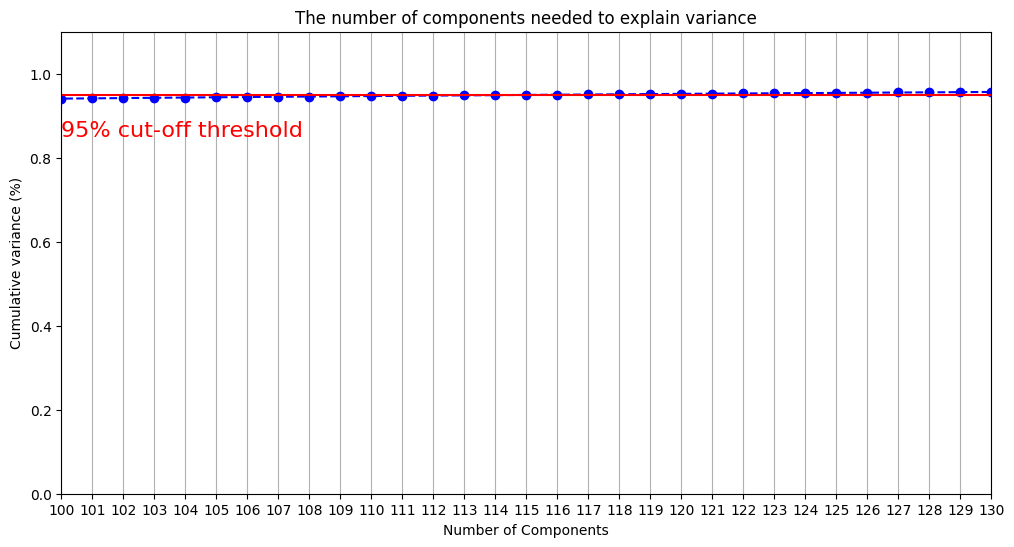

In [8]:
from sklearn.decomposition import PCA
pca = PCA().fit(x)

#% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 785, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 784, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')

ax.grid(axis='x')
plt.xlim(100, 130)
plt.text(100.0, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.show()

# PCA: 82 dimensiones para explicar 95% de varianza

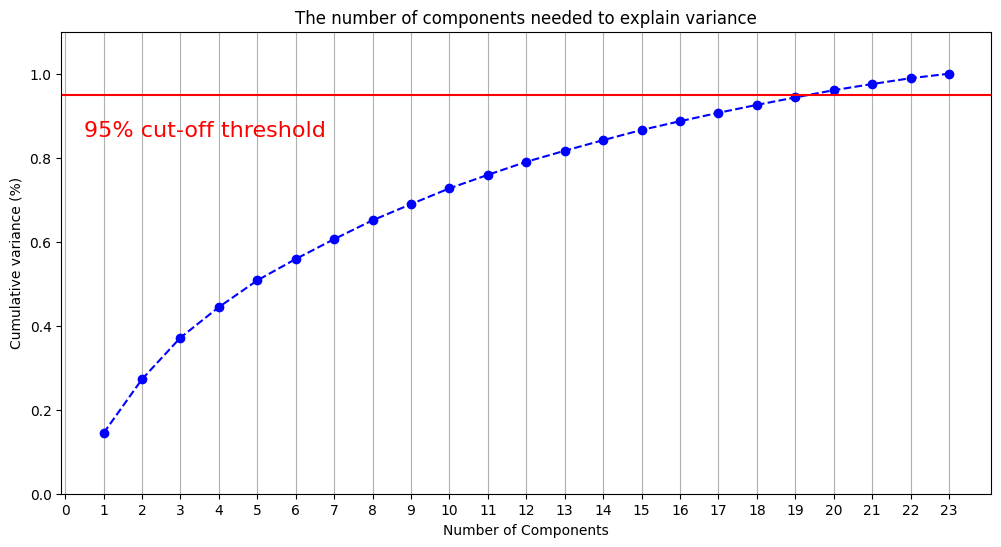

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=23).fit(x,y.ravel())
# X_test = lda.transform(X_test)


#% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 24, step=1)
yi = np.cumsum(lda.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 24, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')

ax.grid(axis='x')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
# plt.xlim(75, 85)
plt.show()

# LDA: 20 dimensiones para explicar 95% de varianza


In [239]:
sign_df = pd.read_csv("dataset/sign_mnist_full.csv")

sign_X = sign_df.loc[:,  sign_df.columns != "label"].values
sign_Y = sign_df.loc[:,["label"]].values

sign_df_train = pd.read_csv("dataset/sign_mnist_train.csv")

sign_X_train = sign_df_train.loc[:,  sign_df_train.columns != "label"].values
sign_Y_train = sign_df_train.loc[:,["label"]].values

sign_df_test = pd.read_csv("dataset/sign_mnist_test.csv")

sign_X_test = sign_df_test.loc[:,  sign_df_test.columns != "label"].values
sign_Y_test = sign_df_test.loc[:,["label"]].values

In [249]:
from xml.etree.ElementInclude import include
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, recall_score, precision_score,roc_auc_score
from sklearn.metrics import classification_report
import numpy as np
import itertools

def Generate_model(X_, Y_, model = None, reducer = None):
#   kf = KFold(n_splits=k_splits_, shuffle=shuffle_)
    precision = recall = f1 = AUC = 0
    # i = 0
#   for train_index, test_index in kf.split(X_):
    # Seleccion train test splits para este KFold
    # X_train, X_test = X_[train_index, :], X_[test_index, :] 
    # Y_train, Y_test = Y_[train_index], Y_[test_index]
    X_train = X_
    Y_train = Y_

    # Normalizacion de datos
    Scaler = StandardScaler()
    X_train = Scaler.fit_transform(X_train)
    X_train = pd.DataFrame(X_train)

    # X_test = Scaler.transform(X_test)
    # X_test = pd.DataFrame(X_test)

    # reducir dimensionalidad, mapea a n_comps_ vectores
    if reducer == None:
      X_train_reducer = X_train
    #   X_test_reducer = X_test
    else:
      X_train_reducer = reducer.fit_transform(X_train,Y_train.ravel())
    #   X_test_reducer = reducer.transform(X_test)

    # Fit, Predict
    model.fit(X_train_reducer, Y_train.ravel())

    return (model, reducer, Scaler)
    # print("model fitted")
    
    # Y_predicted = model.predict(X_test_reducer)
    # print("model predicted")

    # print(Y_test.shape)
    # print(Y_predicted.shape)
    
    # metrics
    # precision += precision_score(Y_test, Y_predicted, average="macro")
    # recall += recall_score(Y_test, Y_predicted, average="macro")
    # f1 += f1_score(Y_test, Y_predicted,  average="macro")
    # AUC += roc_auc_score(Y_test, model.predict_proba(X_test_reducer),multi_class='ovr',average='macro')
    # print(f"{i}...",end='')
    # i += 1

#   print("\n")
#   precision /= k_splits_
#   recall /= k_splits_
#   f1 /= k_splits_
#   AUC /= k_splits_

#   print(f"Final metrics ({k_splits_}-Folds, shuffling={shuffle_}\n", 
#   "Precision:", "{:.2f}".format(precision),
#   " | Recall:", "{:.2f}".format(recall), 
#   " | F1:", "{:.2f}".format(f1),
#   " | AUC:","{:.2f}".format(AUC))

#   # plot_cnf_matrix(Y_test, Y_predicted)
#   return(np.array([[precision, recall, f1, AUC]]))

# KFold_KNN(sign_X, sign_Y, 4, 1, 1)
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier

K_ = 6
vector = 23

final_model, final_reducer, final_scaler  = Generate_model(sign_X_train, sign_Y_train, 
                                            model=CalibratedClassifierCV(LinearSVC(max_iter=10000)),
                                            # model=SVC(decision_function_shape='ovo', probability=True),
                                            # model=KNeighborsClassifier(n_neighbors=K_),
                                            reducer=LDA(n_components=vector))
                        # table_res_kf = pd.concat([table_res_kf, pd.DataFrame([np.append(res, 
                        #                     [f"KFold(n_iterations={k_f}, shuffle={sh})",
                        #                     f"LDA(n_components={vector})",
                        #                     f"KNeighborsClassifier(n_neighbors={K_})"])],
                        #                     columns=cols)],axis=0, ignore_index = True)
                        # table_res_kf.to_csv("table_res_kf_output.csv",index=False) #write

from joblib import dump, load
dump((final_model, final_reducer, final_scaler), 'final_model.joblib')

['final_model.joblib']

In [2]:
%pip install scikit-image
%pip install pywt

     --------------------------------------- 12.0/12.0 MB 10.1 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 10.7 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 11.1 MB/s eta 0:00:00
     -------------------------------------- 208.5/208.5 kB 6.2 MB/s eta 0:00:00
     ---------------------------------------- 3.4/3.4 MB 10.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pywt (from versions: none)
ERROR: No matching distribution found for pywt


In [250]:

from tkinter import Y
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
import pywt
from joblib import dump, load
from sklearn.metrics import f1_score, recall_score, precision_score,roc_auc_score

import pywt.data
from PIL import Image

clf,red,sca = load('final_model.joblib') 

# def Haar(imagen, cortes):
#   for i in range(cortes):
#     imagen, (LH, HL, HH) = pywt.dwt2(imagen, 'haar') 
#   return imagen

# # foto1 = "test_imgs/image (19).png"
# # foto  = (imread(foto1))

# # print(foto)
# # imagen = Haar(img,4)
# # print(imagen.shape)
# # imshow(imagen)
# imshow(sign_X[2].reshape((28, 28)))
# img = np.asarray(Image.open("test_imgs/test_A.png").convert('L'))
# imshow(img)

# test_img = img.flatten()
# print(max(sign_X[0]))
# print(max(test_img))
# # print(foto)

# X_test = sca.transform([test_img])
# # print(max(X_test[0]))
# X_test_reducer = red.transform(X_test)
# # # print(X_test_reducer)
# # X_test_reducer = X_test

# Y_predicted = clf.predict(X_test_reducer)


X_test = sca.transform(sign_X_test)
Y_test = sign_Y_test
# print(max(X_test[0]))
X_test_reducer = red.transform(X_test)
# # print(X_test_reducer)
# X_test_reducer = X_test

Y_predicted = clf.predict(X_test_reducer)
precision = precision_score(Y_test, Y_predicted, average="macro")
recall = recall_score(Y_test, Y_predicted, average="macro")
f1 = f1_score(Y_test, Y_predicted,  average="macro")
AUC = roc_auc_score(Y_test, clf.predict_proba(X_test_reducer),multi_class='ovr',average='macro')

print(f"Final metrics\n", 
"Precision:", "{:.2f}".format(precision),
" | Recall:", "{:.2f}".format(recall), 
" | F1:", "{:.2f}".format(f1),
" | AUC:","{:.2f}".format(AUC))
# plot_cnf_matrix(Y_test, Y_pre
print(mappings[Y_predicted])
X_test = pd.DataFrame(X_test)

print(mappings[Y_test])


Final metrics
 Precision: 0.38  | Recall: 0.37  | F1: 0.36  | AUC: 0.78
['p' 'f' 'l' ... 'p' 'e' 'p']
[['g']
 ['f']
 ['l']
 ...
 ['c']
 ['e']
 ['c']]
